In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting(use_latex='mathjax')

In [2]:
class ReferenceFrame(me.ReferenceFrame):

    def __init__(self, *args, **kwargs):

        kwargs.pop('latexs', None)

        lab = args[0].lower()
        tex = r'\hat{{{}}}_{}'

        super(ReferenceFrame, self).__init__(*args,
                                             latexs=(tex.format(lab, 'x'),
                                                     tex.format(lab, 'y'),
                                                     tex.format(lab, 'z')),
                                             **kwargs)
me.ReferenceFrame = ReferenceFrame

In [3]:
m = sm.symbols('m')

m_total = m + m + m/2
m_total

5⋅m
───
 2 

In [4]:
p, r, h, z, theta = sm.symbols('rho, r, h, z, theta')

sm.integrate(p*r, (r, 0, r/h*z), (theta, 0, 2*sm.pi), (z, 0, h))

     2  
π⋅h⋅r ⋅ρ
────────
   3    

In [5]:
m1, m2, m3 = sm.symbols('m1, m2, m3')
x1, x2, x3 = me.dynamicsymbols('x1, x2, x3')
y1, y2, y3 = me.dynamicsymbols('y1, y2, y3')
z1, z2, z3 = me.dynamicsymbols('z1, z2, z3')

A = me.ReferenceFrame('A')

zeroth_moment = (m1 + m2 + m3)

first_moment = (m1*(x1*A.x + y1*A.y + z1*A.z) +
                m2*(x2*A.x + y2*A.y + z2*A.z) +
                m3*(x3*A.x + y3*A.y + z3*A.z))
first_moment

(m₁⋅x₁ + m₂⋅x₂ + m₃⋅x₃) a_x + (m₁⋅y₁ + m₂⋅y₂ + m₃⋅y₃) a_y + (m₁⋅z₁ + m₂⋅z₂ + m
₃⋅z₃) a_z

In [6]:
r_O_So =  first_moment/zeroth_moment
r_O_So

m₁⋅x₁ + m₂⋅x₂ + m₃⋅x₃       m₁⋅y₁ + m₂⋅y₂ + m₃⋅y₃       m₁⋅z₁ + m₂⋅z₂ + m₃⋅z₃
───────────────────── a_x + ───────────────────── a_y + ─────────────────────
     m₁ + m₂ + m₃                m₁ + m₂ + m₃                m₁ + m₂ + m₃


a_z


In [7]:
r_O_So.xreplace({m2: 2*m1, m3: 3*m1}).simplify()

⎛x₁   x₂   x₃⎞       ⎛y₁   y₂   y₃⎞       ⎛z₁   z₂   z₃⎞
⎜── + ── + ──⎟ a_x + ⎜── + ── + ──⎟ a_y + ⎜── + ── + ──⎟ a_z
⎝6    3    2 ⎠       ⎝6    3    2 ⎠       ⎝6    3    2 ⎠

In [8]:
m, r, theta = sm.symbols('m, r, theta')
A = me.ReferenceFrame('A')

In [9]:
r_O_m = (r + r*sm.sin(theta))*A.x + r*sm.cos(theta)*A.y
r_O_2m = (r + r*sm.sin(theta + sm.pi/7))*A.x + r*sm.cos(theta + sm.pi/7)*A.y
r_O_3m = (r + r*sm.sin(theta - sm.pi/6))*A.x + r*sm.cos(theta - sm.pi/6)*A.y

In [10]:
Iyy = (m*me.dot(r_O_m.cross(A.y), r_O_m.cross(A.y)) +
       2*m*me.dot(r_O_2m.cross(A.y), r_O_2m.cross(A.y)) +
       3*m*me.dot(r_O_3m.cross(A.y), r_O_3m.cross(A.y)))
Iyy

                                          2                           2
                2       ⎛     ⎛    π⎞    ⎞        ⎛       ⎛    π⎞    ⎞ 
m⋅(r⋅sin(θ) + r)  + 2⋅m⋅⎜r⋅sin⎜θ + ─⎟ + r⎟  + 3⋅m⋅⎜- r⋅cos⎜θ + ─⎟ + r⎟ 
                        ⎝     ⎝    7⎠    ⎠        ⎝       ⎝    3⎠    ⎠ 

In [11]:
dIyydtheta = sm.simplify(Iyy.diff(theta))
dIyydtheta

     2 ⎛                        ⎛   ⎛    π⎞    ⎞    ⎛    π⎞     ⎛   ⎛    π⎞   
2⋅m⋅r ⋅⎜(sin(θ) + 1)⋅cos(θ) + 2⋅⎜sin⎜θ + ─⎟ + 1⎟⋅cos⎜θ + ─⎟ - 3⋅⎜cos⎜θ + ─⎟ - 
       ⎝                        ⎝   ⎝    7⎠    ⎠    ⎝    7⎠     ⎝   ⎝    3⎠   

 ⎞    ⎛    π⎞⎞
1⎟⋅sin⎜θ + ─⎟⎟
 ⎠    ⎝    3⎠⎠

In [12]:
theta_sol = sm.nsolve((dIyydtheta/m/r**2).evalf(), theta, 0)
theta_sol

-1.49935061382135

In [13]:
import math

theta_sol*180/math.pi

-85.9064621823125

In [14]:
kyy = sm.sqrt(Iyy/m)
kyy

       _______________________________________________________________________
      ╱                                           2                           
     ╱                  2       ⎛     ⎛    π⎞    ⎞        ⎛       ⎛    π⎞    ⎞
    ╱   m⋅(r⋅sin(θ) + r)  + 2⋅m⋅⎜r⋅sin⎜θ + ─⎟ + r⎟  + 3⋅m⋅⎜- r⋅cos⎜θ + ─⎟ + r⎟
   ╱                            ⎝     ⎝    7⎠    ⎠        ⎝       ⎝    3⎠    ⎠
  ╱     ──────────────────────────────────────────────────────────────────────
╲╱                                         m                                  

__
2 
  
  
  
─ 
  

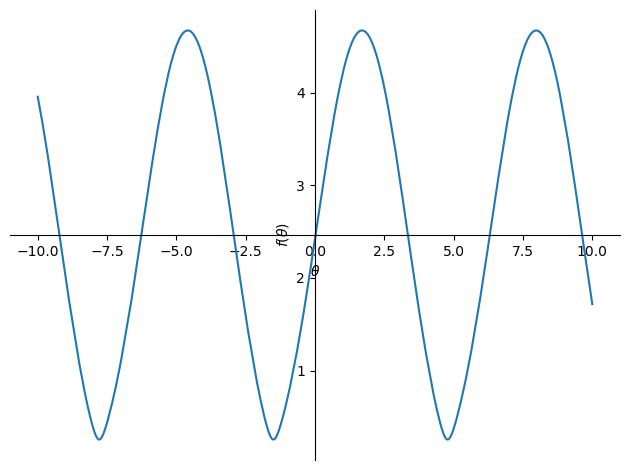

In [15]:
sm.plot(kyy.xreplace({m: 1, r: 1}));

In [16]:
kyy.xreplace({m: 1, r: 1, theta: theta_sol}).evalf()

0.255558185585985

In [17]:
v1, v2, v3 = sm.symbols('v1, v2, v3')
w1, w2, w3 = sm.symbols('w1, w2, w3')

A = me.ReferenceFrame('A')

v = v1*A.x + v2*A.y + v3*A.z
w = w1*A.x + w2*A.y + w3*A.z

Q = me.outer(v, w)
Q

v₁⋅w₁ a_x⊗a_x + v₁⋅w₂ a_x⊗a_y + v₁⋅w₃ a_x⊗a_z + v₂⋅w₁ a_y⊗a_x + v₂⋅w₂ a_y⊗a_y + v₂⋅w₃ a_y⊗a_z + v₃⋅w₁ a_z⊗a_x + v₃⋅w₂ a_z⊗a_y + v₃⋅w₃ a_z⊗a_z

In [18]:
Q.to_matrix(A)

⎡v₁⋅w₁  v₁⋅w₂  v₁⋅w₃⎤
⎢                   ⎥
⎢v₂⋅w₁  v₂⋅w₂  v₂⋅w₃⎥
⎢                   ⎥
⎣v₃⋅w₁  v₃⋅w₂  v₃⋅w₃⎦

In [19]:
me.outer(A.x, A.x)

a_x⊗a_x

In [20]:
me.outer(A.x, A.x).to_matrix(A)

⎡1  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [21]:
me.outer(A.y, A.z)

a_y⊗a_z

In [22]:
me.outer(A.y, A.z).to_matrix(A)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  0  0⎦

In [23]:
theta = sm.symbols("theta")

A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

B.orient_axis(A, theta, A.x)

P = 2*me.outer(B.x, B.x) + 3*me.outer(A.x, B.y) + 4*me.outer(B.z, A.z)
P

2 b_x⊗b_x + 3 a_x⊗b_y + 4 b_z⊗a_z

In [24]:
P.express(A)

2 a_x⊗a_x + 3⋅cos(θ) a_x⊗a_y + 3⋅sin(θ) a_x⊗a_z - 4⋅sin(θ) a_y⊗a_z + 4⋅cos(θ) a_z⊗a_z

In [25]:
P.to_matrix(A)

⎡2  3⋅cos(θ)  3⋅sin(θ) ⎤
⎢                      ⎥
⎢0     0      -4⋅sin(θ)⎥
⎢                      ⎥
⎣0     0      4⋅cos(θ) ⎦

In [26]:
P.express(B)

2 b_x⊗b_x + 3 b_x⊗b_y + 4⋅sin(θ) b_z⊗b_y + 4⋅cos(θ) b_z⊗b_z

In [27]:
P.to_matrix(B)

⎡2     3         0    ⎤
⎢                     ⎥
⎢0     0         0    ⎥
⎢                     ⎥
⎣0  4⋅sin(θ)  4⋅cos(θ)⎦

In [28]:
U = me.outer(A.x, A.x) + me.outer(A.y, A.y) + me.outer(A.z, A.z)
U

a_x⊗a_x + a_y⊗a_y + a_z⊗a_z

In [29]:
U.to_matrix(A)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [30]:
U.express(B).simplify()

b_x⊗b_x + b_y⊗b_y + b_z⊗b_z

In [31]:
Ixx, Iyy, Izz = sm.symbols('I_{xx}, I_{yy}, I_{zz}')
Ixy, Iyz, Ixz = sm.symbols('I_{xy}, I_{yz}, I_{xz}')

I = me.inertia(A, Ixx, Iyy, Izz, ixy=Ixy, iyz=Iyz, izx=Ixz)
I

I_{xx} a_x⊗a_x + I_{xy} a_x⊗a_y + I_{xz} a_x⊗a_z + I_{xy} a_y⊗a_x + I_{yy} a_y⊗a_y + I_{yz} a_y⊗a_z + I_{xz} a_z⊗a_x + I_{yz} a_z⊗a_y + I_{zz} a_z⊗a_z

In [32]:
I.to_matrix(A)

⎡I_{xx}  I_{xy}  I_{xz}⎤
⎢                      ⎥
⎢I_{xy}  I_{yy}  I_{yz}⎥
⎢                      ⎥
⎣I_{xz}  I_{yz}  I_{zz}⎦

In [33]:
sm.trigsimp(I.to_matrix(B))

⎡            I_{xx}                                  I_{xy}⋅cos(θ) + I_{xz}⋅si
⎢                                                                             
⎢                                I_{yy}⋅cos(2⋅θ)   I_{yy}                     
⎢I_{xy}⋅cos(θ) + I_{xz}⋅sin(θ)   ─────────────── + ────── + I_{yz}⋅sin(2⋅θ) - 
⎢                                       2            2                        
⎢                                                                             
⎢                                          I_{yy}⋅sin(2⋅θ)                    
⎢-I_{xy}⋅sin(θ) + I_{xz}⋅cos(θ)          - ─────────────── + I_{yz}⋅cos(2⋅θ) +
⎣                                                 2                           

n(θ)                                          -I_{xy}⋅sin(θ) + I_{xz}⋅cos(θ)  
                                                                              
I_{zz}⋅cos(2⋅θ)   I_{zz}             I_{yy}⋅sin(2⋅θ)                     I_{zz
─────────────── + ──────           - ──────────────

In [34]:
sm.trigsimp(B.dcm(A)*I.to_matrix(A)*A.dcm(B))

⎡            I_{xx}                                  I_{xy}⋅cos(θ) + I_{xz}⋅si
⎢                                                                             
⎢                                I_{yy}⋅cos(2⋅θ)   I_{yy}                     
⎢I_{xy}⋅cos(θ) + I_{xz}⋅sin(θ)   ─────────────── + ────── + I_{yz}⋅sin(2⋅θ) - 
⎢                                       2            2                        
⎢                                                                             
⎢                                          I_{yy}⋅sin(2⋅θ)                    
⎢-I_{xy}⋅sin(θ) + I_{xz}⋅cos(θ)          - ─────────────── + I_{yz}⋅cos(2⋅θ) +
⎣                                                 2                           

n(θ)                                          -I_{xy}⋅sin(θ) + I_{xz}⋅cos(θ)  
                                                                              
I_{zz}⋅cos(2⋅θ)   I_{zz}             I_{yy}⋅sin(2⋅θ)                     I_{zz
─────────────── + ──────           - ──────────────

In [35]:
N = me.ReferenceFrame('N')

I = (0.25*me.outer(N.x, N.x) +
     0.25*me.outer(N.y, N.y) +
     0.10*me.outer(N.z, N.z) -
     0.07*me.outer(N.x, N.z) -
     0.07*me.outer(N.z, N.x))
I

0.250000000000000 n_x⊗n_x + 0.250000000000000 n_y⊗n_y + 0.100000000000000 n_z⊗n_z - 0.0700000000000000 n_x⊗n_z - 0.0700000000000000 n_z⊗n_x

In [36]:
H = me.ReferenceFrame('H')
H.orient_axis(N, 68.0*sm.pi/180, N.y)

In [37]:
I.dot(H.z).dot(H.z).evalf()

0.180324399093269

In [38]:
I.to_matrix(N)

⎡0.25    0    -0.07⎤
⎢                  ⎥
⎢  0    0.25    0  ⎥
⎢                  ⎥
⎣-0.07   0     0.1 ⎦

In [39]:
I_H = (H.dcm(N) @ I.to_matrix(N) @ N.dcm(H)).evalf()
I_H

⎡0.169675600906731   0    0.10245316380813 ⎤
⎢                                          ⎥
⎢        0          0.25          0        ⎥
⎢                                          ⎥
⎣0.10245316380813    0    0.180324399093269⎦

In [40]:
I_H[2, 2]

0.180324399093269

In [41]:
dx, dy, dz, m = sm.symbols('d_x, d_y, d_z, m')

N = me.ReferenceFrame('N')

r_O_Bo = dx*N.x + dy*N.y + dz*N.z

U = me.outer(N.x, N.x) + me.outer(N.y, N.y) + me.outer(N.z, N.z)

I_Bo_O = m*(me.dot(r_O_Bo, r_O_Bo)*U - me.outer(r_O_Bo, r_O_Bo))
I_Bo_O

  ⎛   2      2⎞
m⋅⎝d_y  + d_z ⎠ n_x⊗n_x +   ⎛  2      2⎞
m⋅⎝dₓ  + d_z ⎠ n_y⊗n_y +   ⎛  2      2⎞
m⋅⎝dₓ  + d_y ⎠ n_z⊗n_z - dₓ⋅d_y⋅m n_x⊗n_y - dₓ⋅d_z⋅m n_x⊗n_z - dₓ⋅d_y⋅m n_y⊗n_x - d_y⋅d_z⋅m n_y⊗n_z - dₓ⋅d_z⋅m n_z⊗n_x - d_y⋅d_z⋅m n_z⊗n_y

In [42]:
I_Bo_O.to_matrix(N)

⎡  ⎛   2      2⎞                                ⎤
⎢m⋅⎝d_y  + d_z ⎠    -dₓ⋅d_y⋅m       -dₓ⋅d_z⋅m   ⎥
⎢                                               ⎥
⎢                   ⎛  2      2⎞                ⎥
⎢   -dₓ⋅d_y⋅m     m⋅⎝dₓ  + d_z ⎠    -d_y⋅d_z⋅m  ⎥
⎢                                               ⎥
⎢                                   ⎛  2      2⎞⎥
⎣   -dₓ⋅d_z⋅m       -d_y⋅d_z⋅m    m⋅⎝dₓ  + d_y ⎠⎦

In [43]:
I = sm.Matrix([[1.0451, 0.0, -0.1123],
               [0.0, 2.403, 0.0],
               [-0.1123, 0.0, 1.8501]])
I

⎡1.0451     0    -0.1123⎤
⎢                       ⎥
⎢   0     2.403     0   ⎥
⎢                       ⎥
⎣-0.1123    0    1.8501 ⎦

In [44]:
ev1, ev2, ev3 = I.eigenvects()

In [45]:
ev1[0]

2.40300000000000

In [46]:
ev1[2][0]

⎡ 0 ⎤
⎢   ⎥
⎢1.0⎥
⎢   ⎥
⎣ 0 ⎦

In [47]:
ev2[0]

1.02972736390139

In [48]:
ev2[2][0]

⎡-0.990760351805416⎤
⎢                  ⎥
⎢        0         ⎥
⎢                  ⎥
⎣-0.135624206137434⎦

In [49]:
ev3[0]

1.86547263609861

In [50]:
ev3[2][0]

⎡0.135624206137434 ⎤
⎢                  ⎥
⎢        0         ⎥
⎢                  ⎥
⎣-0.990760351805416⎦

In [51]:
Ixx, Iyy, Izz = sm.symbols('I_{xx}, I_{yy}, I_{zz}')
Ixy, Iyz, Ixz = sm.symbols('I_{xy}, I_{yz}, I_{xz}')
w1, w2, w3 = me.dynamicsymbols('omega1, omega2, omega3')

B = me.ReferenceFrame('B')

I = me.inertia(B, Ixx, Iyy, Izz, Ixy, Iyz, Ixz)

A_w_B = w1*B.x + w2*B.y + w3*B.z

I.dot(A_w_B)

(I_{xx}⋅ω₁ + I_{xy}⋅ω₂ + I_{xz}⋅ω₃) b_x + (I_{xy}⋅ω₁ + I_{yy}⋅ω₂ + I_{yz}⋅ω₃)
b_y + (I_{xz}⋅ω₁ + I_{yz}⋅ω₂ + I_{zz}⋅ω₃) b_z

In [52]:
I1, I2, I3 = sm.symbols('I_1, I_2, I_3')
w1, w2, w3 = me.dynamicsymbols('omega1, omega2, omega3')

B = me.ReferenceFrame('B')

I = me.inertia(B, I1, I2, I3)

A_w_B = w1*B.x + w2*B.y + w3*B.z

I.dot(A_w_B)

I₁⋅ω₁ b_x + I₂⋅ω₂ b_y + I₃⋅ω₃ b_z